In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [36]:
fraud_data = pd.read_csv(r'C:\Users\HP\week 12th\fraud_detection\data\Fraud_Data.csv')
ip_address_data = pd.read_csv(r'C:\Users\HP\week 12th\fraud_detection\data\IpAddress_to_Country.csv')
credit_card_data = pd.read_csv(r'C:\Users\HP\week 12th\fraud_detection\data\creditcard.csv')

In [37]:
# Check for missing values
print(fraud_data.isnull().sum())
print(ip_address_data.isnull().sum())
print(credit_card_data.isnull().sum())

# Handle missing values (adjust strategy based on specific analysis)
fraud_data.fillna(method='ffill', inplace=True)  # Fill missing values with previous value
ip_address_data.fillna(method='bfill', inplace=True)  # Fill missing values with next value
credit_card_data.dropna(inplace=True)  # Drop rows with missing values

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13584\4097226422.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fraud_data.fillna(method='ffill', inplace=True)  # Fill missing values with previous value
C:\Users\HP\AppData\Local\Temp\ipykernel_13584\4097226422.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ip_address_data.fillna(method='bfill', inplace=True)  # Fill missing values with next value


In [38]:
fraud_data.drop_duplicates(inplace=True)
ip_address_data.drop_duplicates(inplace=True)
credit_card_data.drop_duplicates(inplace=True)

In [39]:
# Convert 'signup_time' and 'purchase_time' to datetime format
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Ensure numerical columns are in the correct format (if needed)
fraud_data['purchase_value'] = pd.to_numeric(fraud_data['purchase_value'])

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


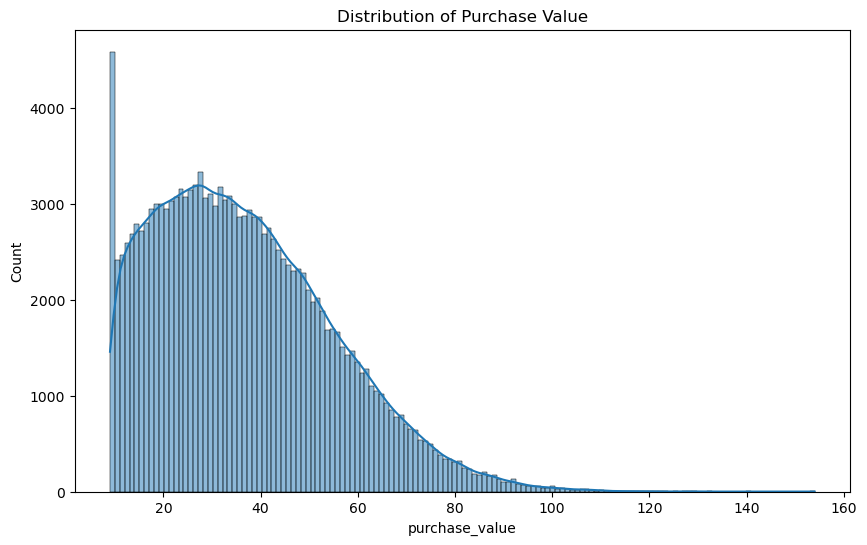

In [40]:
# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.histplot(fraud_data['purchase_value'], kde=True)
plt.title('Distribution of Purchase Value')
plt.show()

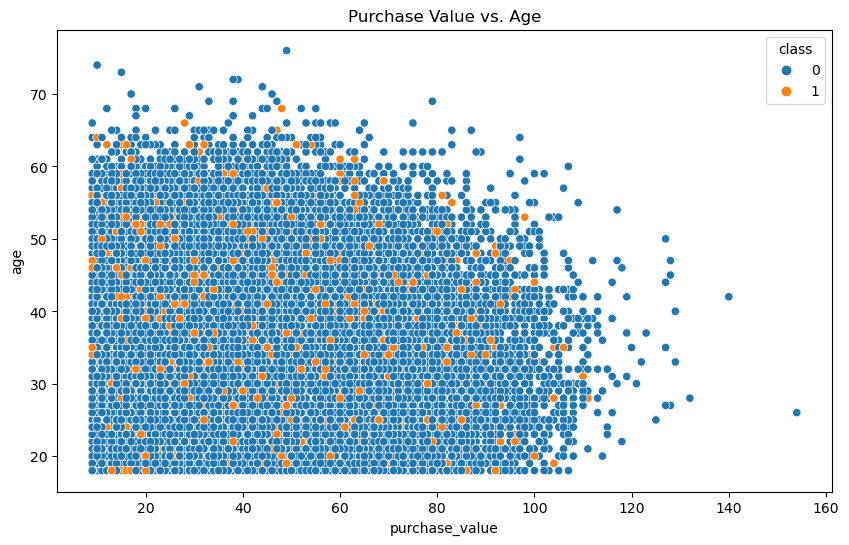

In [41]:
# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='purchase_value', y='age', hue='class', data=fraud_data)
plt.title('Purchase Value vs. Age')
plt.show()

In [42]:
# Check for missing columns
print(fraud_data.columns)
print(ip_address_data.columns)

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')
Index(['lower_bound_ip_address', 'upper_bound_ip_address', 'country'], dtype='object')


In [43]:
import ipaddress

def ip_to_int(ip):
    packed_ip = ipaddress.ip_address(ip).packed
    return int.from_bytes(packed_ip, byteorder='big')

# Convert IP addresses to integer format
fraud_data['ip_int'] = fraud_data['ip_address'].apply(ip_to_int)
ip_address_data['lower_bound_int'] = ip_address_data['lower_bound_ip_address'].astype(int)
ip_address_data['upper_bound_int'] = ip_address_data['upper_bound_ip_address'].astype(int)

# Merge datasets based on IP address range
fraud_data = pd.merge(fraud_data, ip_address_data, left_on='ip_int', right_on='lower_bound_int', how='left')

ValueError: 732758368.79972 does not appear to be an IPv4 or IPv6 address

In [ ]:
fraud_data.to_csv('merged_data.csv', index=False)